In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set( rc={'figure.figsize':(16,10)} )

In [28]:
cr = pd.read_excel('CumulativeReward.xlsx')
cr['Details'] = cr['Model'] + ' ( N=' + cr['Steps'].astype(str) + ', H=' + cr['Horizon'].astype(str) + ' )'
cr.head( )

,Slippery,Model,Horizon,Steps,Episode,CumulativeReward,Details
0,True,FHTD,4,1,1,-32.40,"FHTD ( N=1, H=4 )"
1,True,FHTD,4,1,2,-64.65,"FHTD ( N=1, H=4 )"
2,True,FHTD,4,1,3,-96.75,"FHTD ( N=1, H=4 )"
3,True,FHTD,4,1,4,-117.05,"FHTD ( N=1, H=4 )"
4,True,FHTD,4,1,5,-112.10,"FHTD ( N=1, H=4 )"


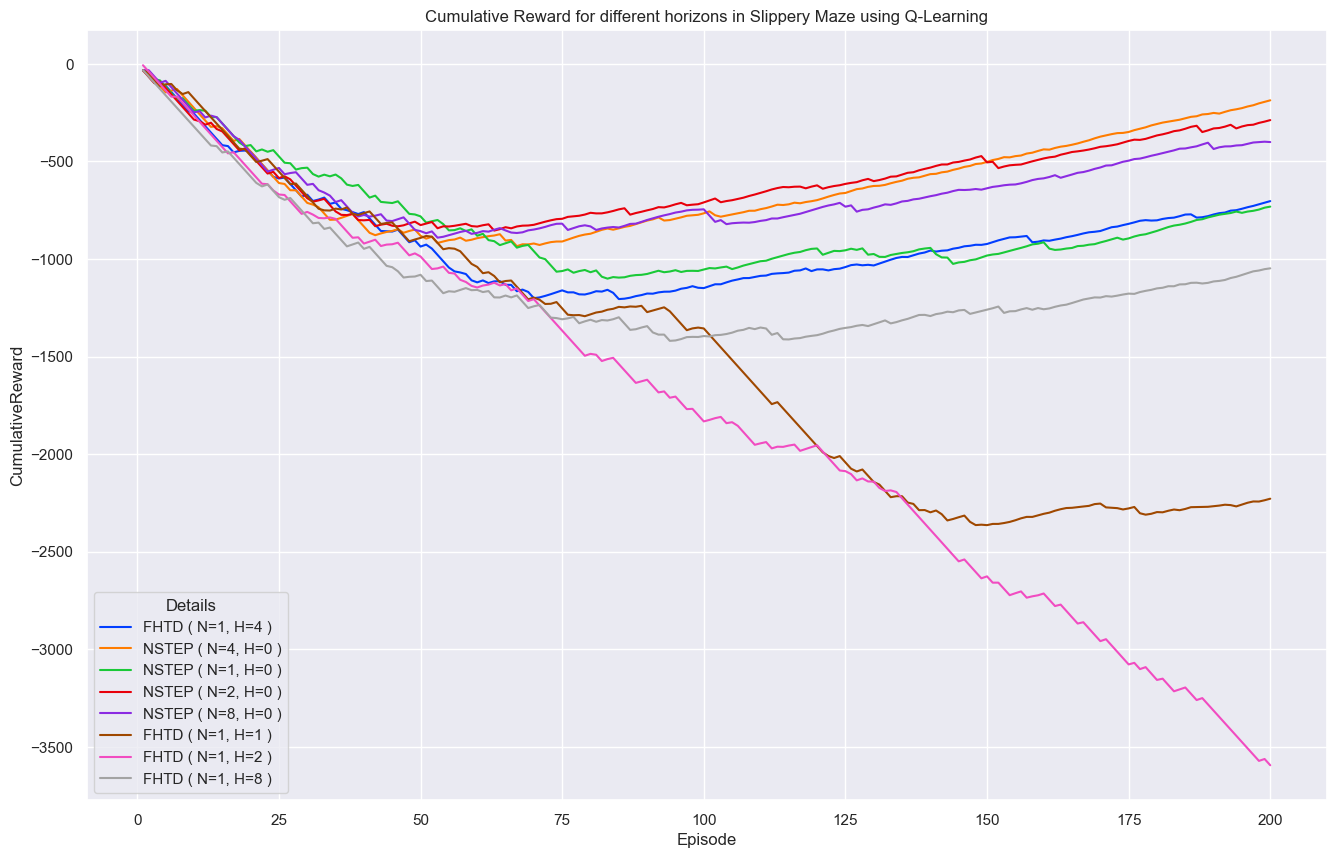

In [29]:
sns.lineplot( data=cr[(cr['Slippery']==True)], x='Episode', y='CumulativeReward', hue='Details', palette='bright' )
plt.title( 'Cumulative Reward for different horizons in Slippery Maze using Q-Learning' )
plt.show( )

In [30]:
wr = pd.read_excel( 'WinRate.xlsx' )
wr['Details'] = wr['Model'] + ' ( N=' + wr['Steps'].astype(str) + ', H=' + wr['Horizon'].astype(str) + ' )'
wr.head( )

,Slippery,Model,Horizon,Steps,Episode,WinRate,Details
0,True,FHTD,4,1,5,0.068182,"FHTD ( N=1, H=4 )"
1,True,FHTD,4,1,10,0.113636,"FHTD ( N=1, H=4 )"
2,True,FHTD,4,1,15,0.068182,"FHTD ( N=1, H=4 )"
3,True,FHTD,4,1,20,0.409091,"FHTD ( N=1, H=4 )"
4,True,FHTD,4,1,25,0.386364,"FHTD ( N=1, H=4 )"


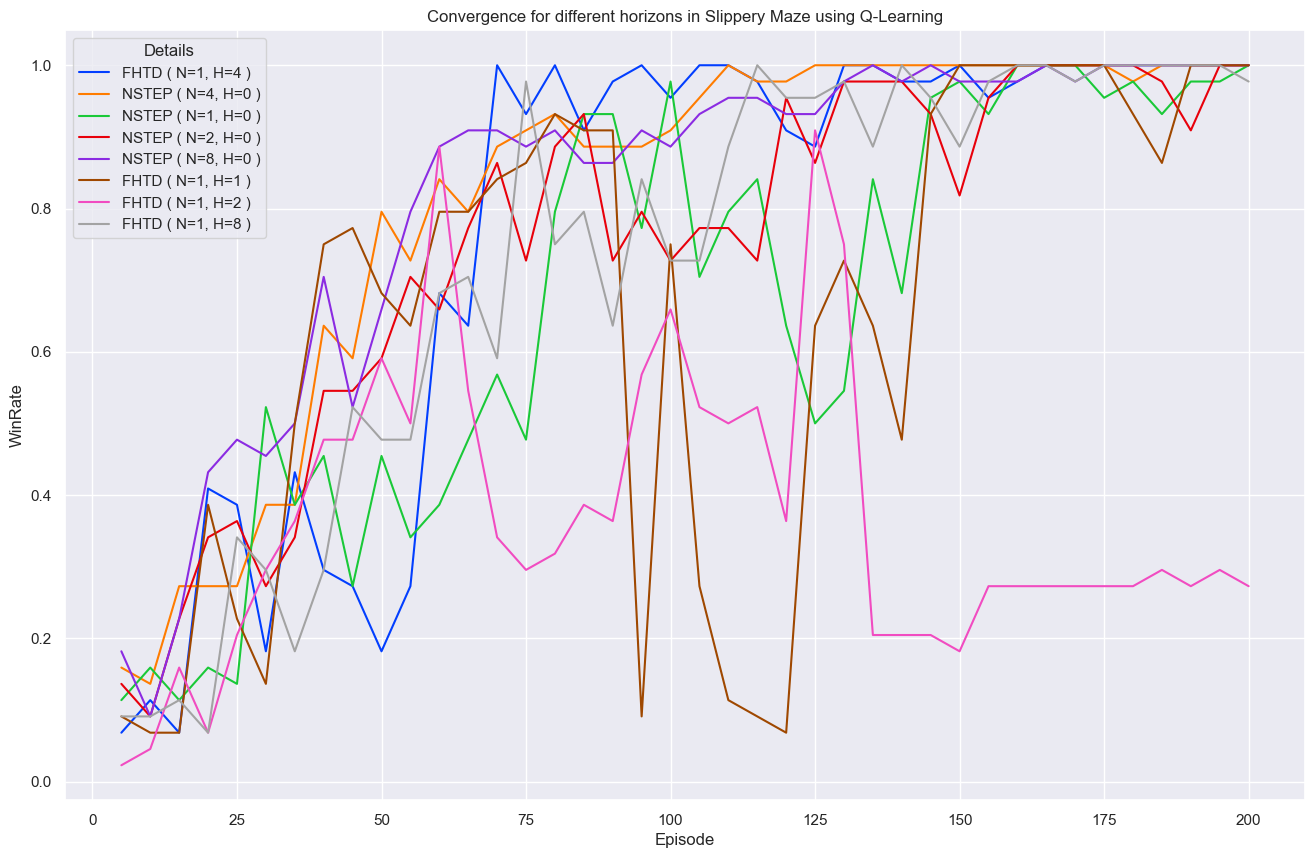

In [31]:
sns.lineplot( data=wr[(wr['Slippery']==True)], x='Episode', y='WinRate', hue='Details', palette='bright' )
plt.title( 'Convergence for different horizons in Slippery Maze using Q-Learning' )
plt.show( )

In [32]:
el = pd.read_excel( 'MeanEpisodeLength.xlsx' )
el['Details'] = el['Model'] + ' ( N=' + el['Steps'].astype(str) + ', H=' + el['Horizon'].astype(str) + ' )'
el.head( )

,Slippery,Model,Horizon,Steps,Alpha,MeanEpisodeLength,Details
0,True,FHTD,4,1,0.1,40.595,"FHTD ( N=1, H=4 )"
1,True,NSTEP,0,4,0.1,30.535,"NSTEP ( N=4, H=0 )"
2,True,NSTEP,0,1,0.1,38.710,"NSTEP ( N=1, H=0 )"
3,True,NSTEP,0,2,0.1,32.800,"NSTEP ( N=2, H=0 )"
4,True,NSTEP,0,8,0.1,33.200,"NSTEP ( N=8, H=0 )"


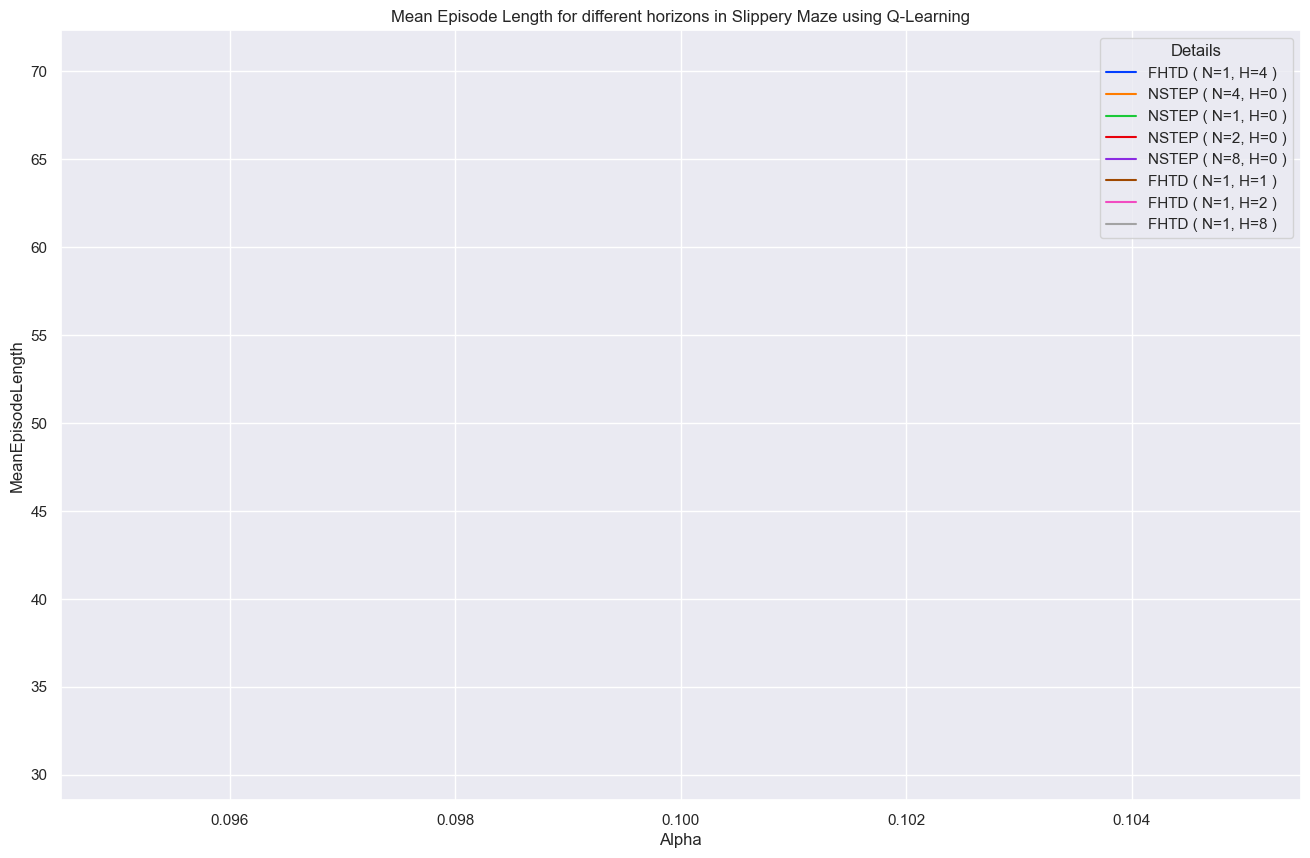

In [33]:
sns.lineplot( data=el[(el['Slippery']==True)], x='Alpha', y='MeanEpisodeLength', hue='Details', palette='bright' )
plt.title( 'Mean Episode Length for different horizons in Slippery Maze using Q-Learning' )
plt.show( )